<a href="https://colab.research.google.com/github/siim2mary/mkdir-my_projects/blob/main/Mushroom_Edibility3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT

# **"EdiFungi: Prepare Machine Learning Model to Safeguard Foragers by Distinguishing Poisonous from Edible Mushrooms"**

---



The overarching objective of this project is to develop a robust and accurate machine learning model capable of predicting the edibility status of mushrooms, discerning between poisonous and edible varieties, leveraging a comprehensive set of features that encapsulate various attributes such as cap shape, cap surface, gill characteristics, stem dimensions, veil properties, and spore print color. Through extensive analysis and predictive modeling, the goal is to create a reliable tool for differentiating between mushroom types, ensuring the safety of individuals engaging in mushroom foraging or related activities.


IMPORT LIBRARIES

---



In [ ]:
#!pip install fastapi kaleido python-multipart uvicorn


In [ ]:
#!pip install --upgrade matplotlib
#!pip install --upgrade plotly
#!pip install --upgrade matplotlib seaborn

In [ ]:
#%matplotlib notebook

In [ ]:
""""
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')
"""

In [ ]:
from IPython.display import display

In [ ]:
# Import necessary libraries

# Importing Python Libraries for Data Processing
import os,sys
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Natural Language Processing (NLP) and Text Analysis Libraries
import re
import string

# Scikit-Learn (sklearn) Libraries for Machine Learning and Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#Models used
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import DecisionTreeClassifier
from sklearn.svm import SVC

#Evaluation Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Dealing with imbalanced dataset
from imblearn.over_sampling import SMOTE


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
path_to_file1= '/content/drive/MyDrive/Data (1).csv'
path_to_file2= '/content/drive/MyDrive/Data 2.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

# Copy the file to the current working directory in Colab
shutil.copy(path_to_file1, './Data (1).csv')


'./Data (1).csv'

In [ ]:
shutil.copy(path_to_file2, './Data 2.csv')

'./Data 2.csv'

**IMPORT DATASET**

---



In [ ]:
df1 = pd.read_csv("/content/Data (1).csv")

In [ ]:
df2 = pd.read_csv("/content/Data 2.csv")

In [ ]:
display(df1.head())

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
df1.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
df1.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [ ]:
display(df2.head())

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,[10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Amanita Family,Panther Cap,p,[5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amanita Family,False Panther Cap,p,[10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amanita Family,The Blusher,e,[5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amanita Family,Death Cap,p,[5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.head()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,[10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Amanita Family,Panther Cap,p,[5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amanita Family,False Panther Cap,p,[10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amanita Family,The Blusher,e,[5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amanita Family,Death Cap,p,[5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.columns

Index(['family', 'name', 'class', 'cap-diameter', 'cap-shape', 'Cap-surface',
       'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing',
       'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface',
       'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type',
       'Spore-print-color', 'habitat', 'season'],
      dtype='object')

In [ ]:
df1.shape

(61069, 21)

In [ ]:
df2.shape

(173, 23)

DATA VISUALISATION USING **AUTOVIZ**

---



In [ ]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 13.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/2

Imported v0.1.804. After importing autoviz, you must run '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (61069, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  14
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
cap-diameter,float64,0.000000,NA,0.380000,62.340000,Column has 2389 outliers greater than upper bound (16.14) or lower than lower bound(-4.10). Cap them or remove them.
cap-shape,object,0.000000,0,,,No issue
cap-surface,object,23.176797,0,,,"14120 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
cap-color,object,0.000000,0,,,No issue
does-bruise-or-bleed,object,0.000000,0,,,No issue
gill-attachment,object,16.176157,0,,,"9855 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
gill-spacing,object,41.137173,0,,,"25062 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: float, object,"
gill-color,object,0.000000,0,,,No issue
stem-height,float64,0.000000,NA,0.000000,33.920000,Column has 4084 outliers greater than upper bound (12.40) or lower than lower bound(0.00). Cap them or remove them.
stem-width,float64,0.000000,NA,0.000000,103.910000,Column has 1980 outliers greater than upper bound (33.57) or lower than lower bound(-11.74). Cap them or remove them.


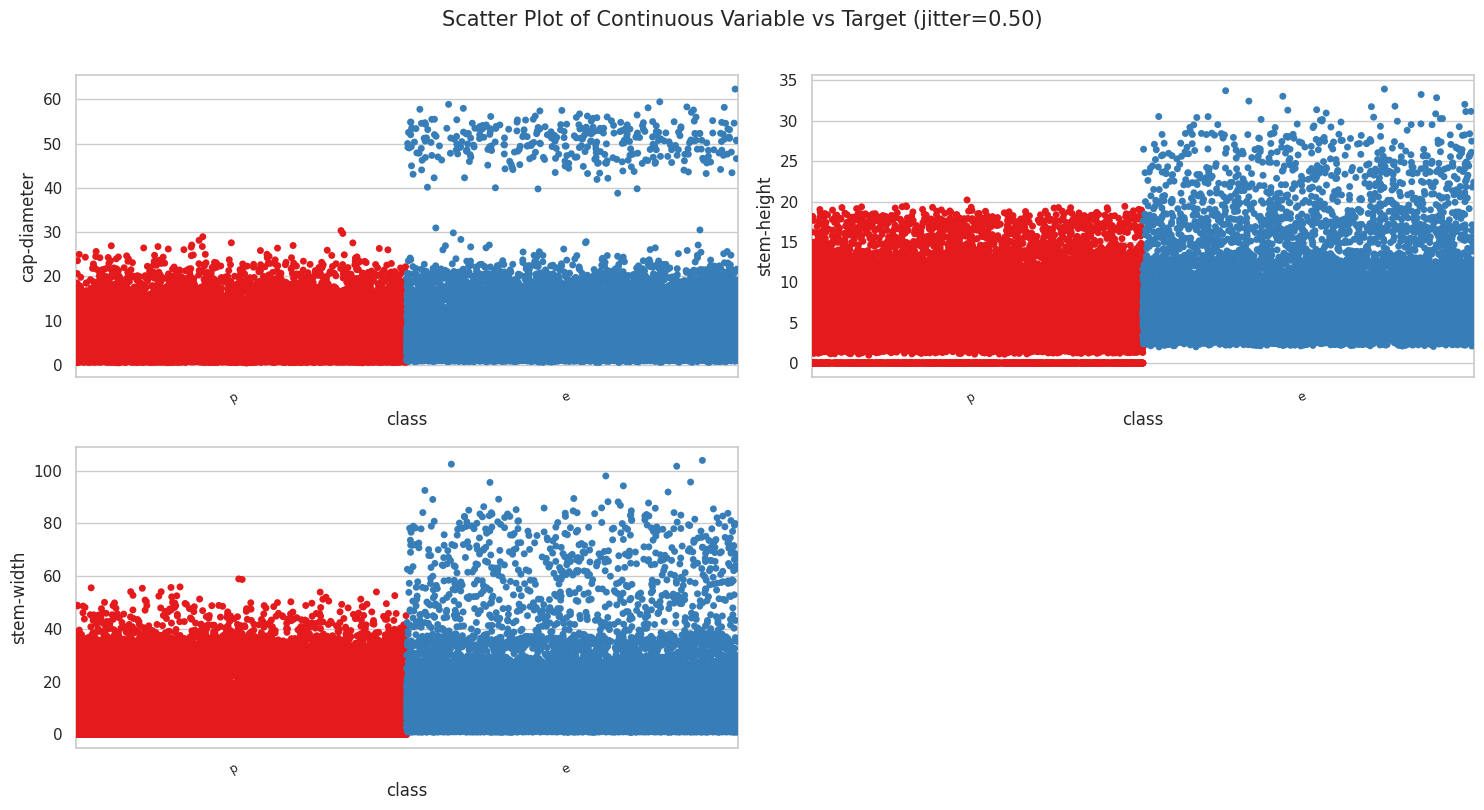

Total Number of Scatter Plots = 6


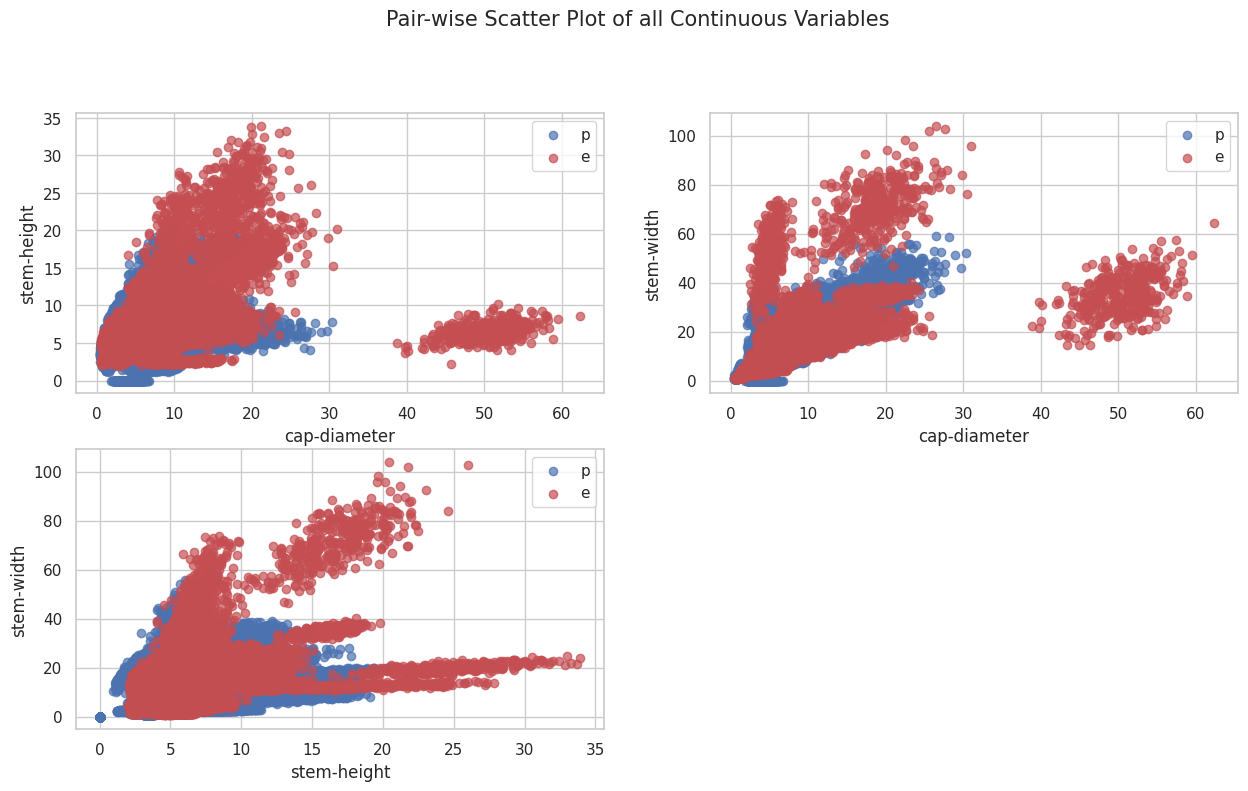

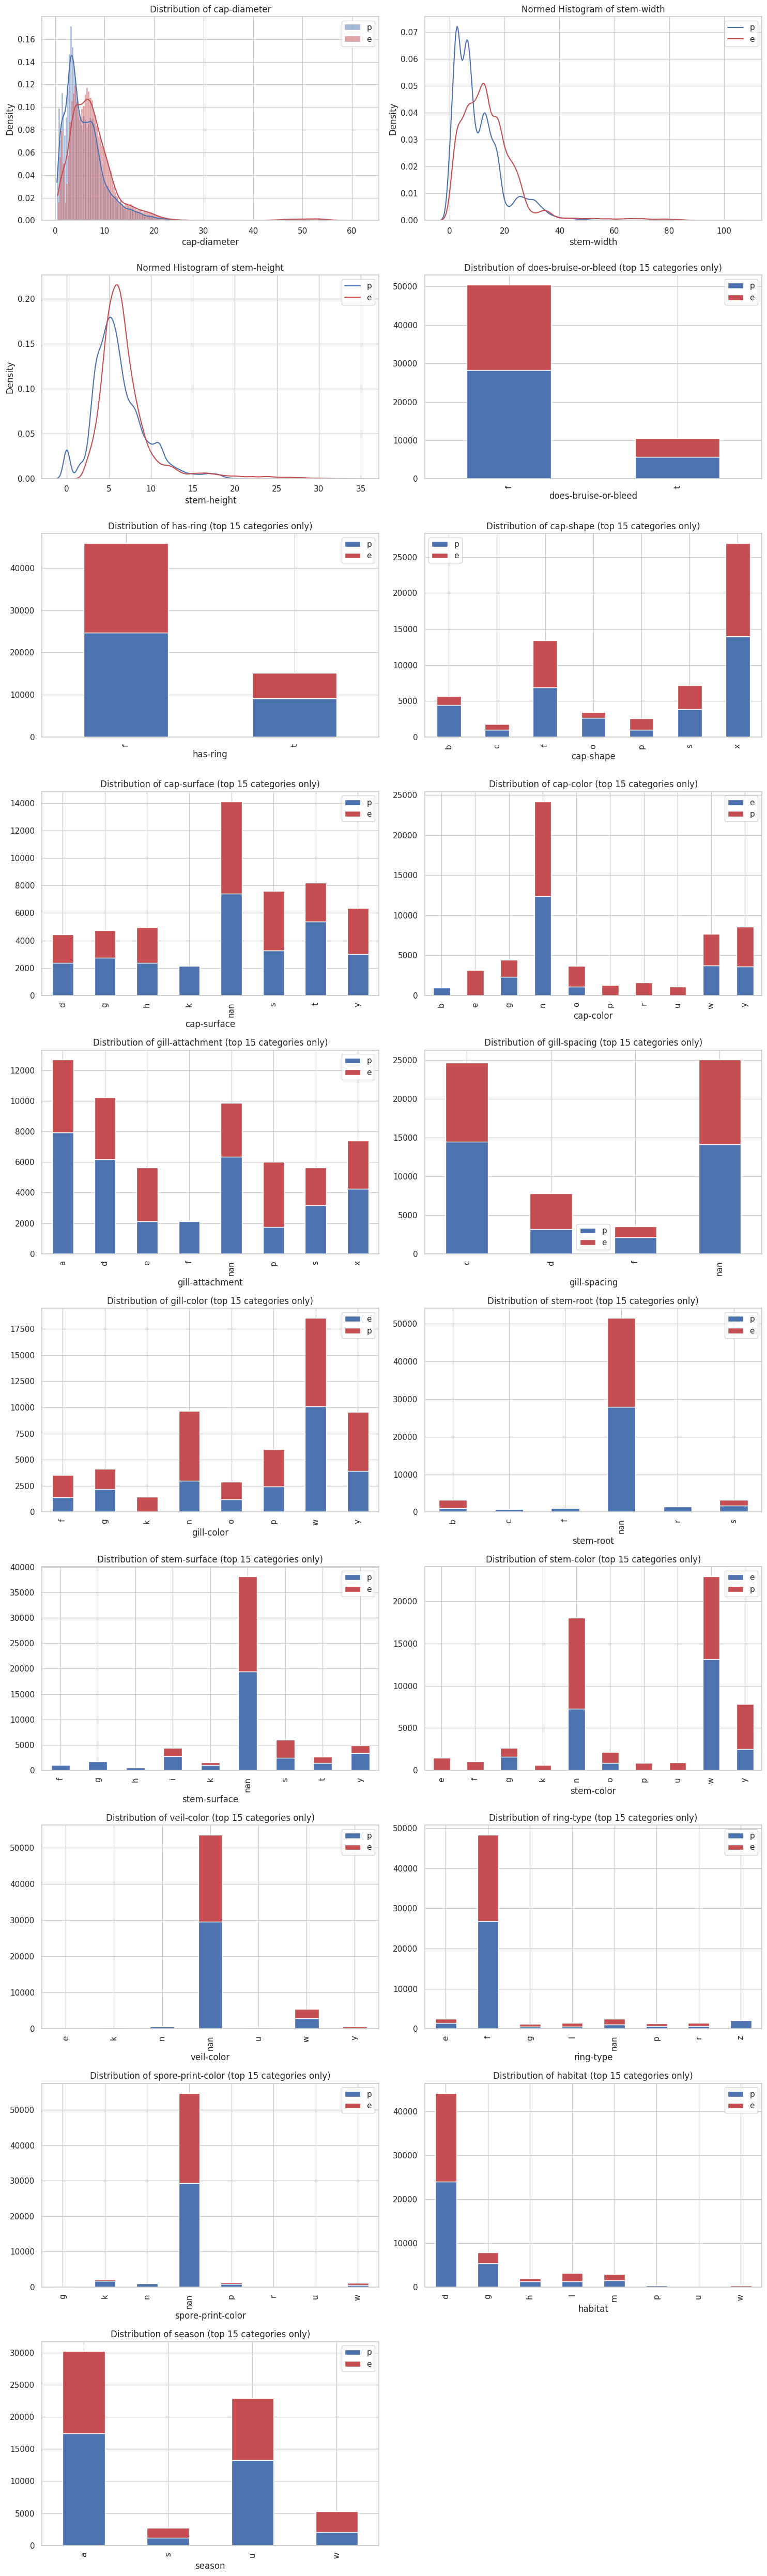

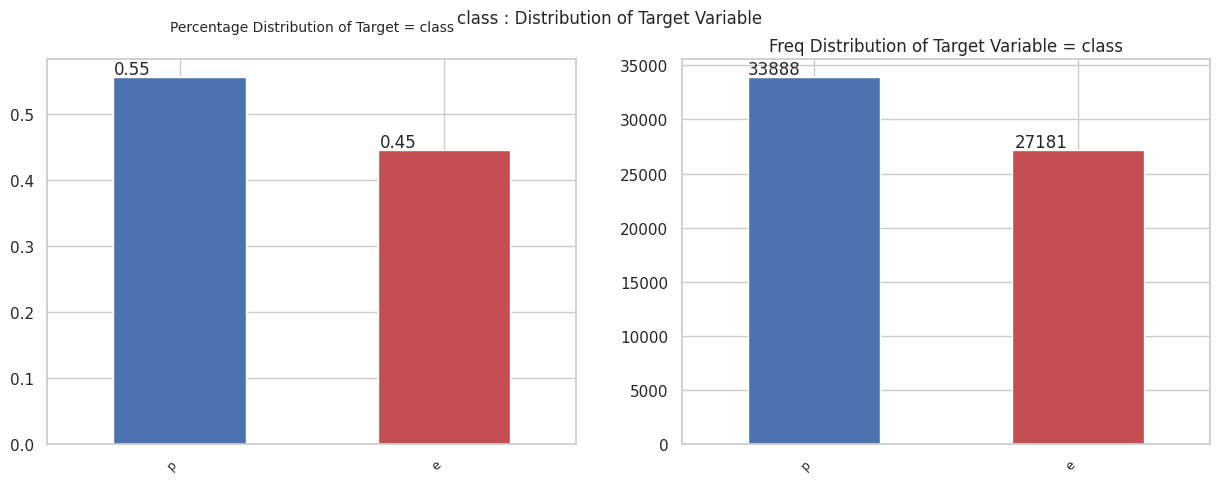

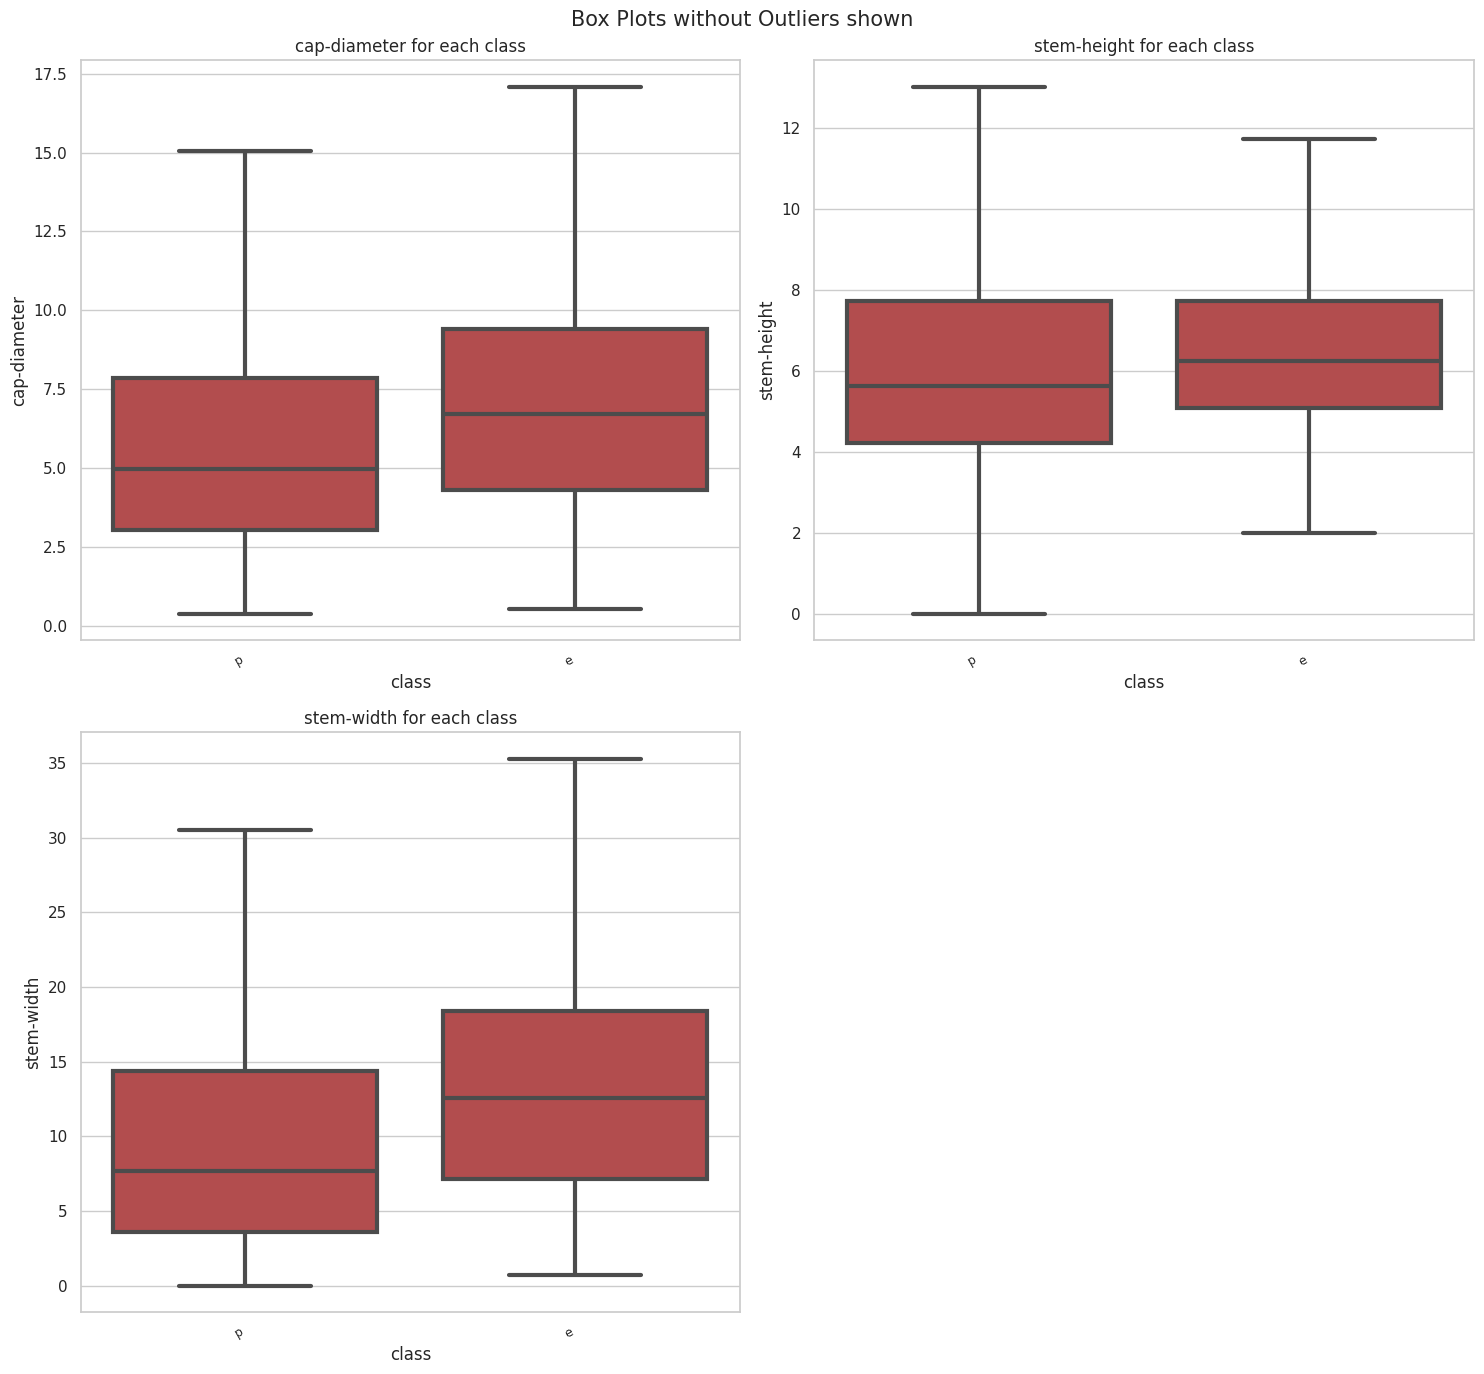

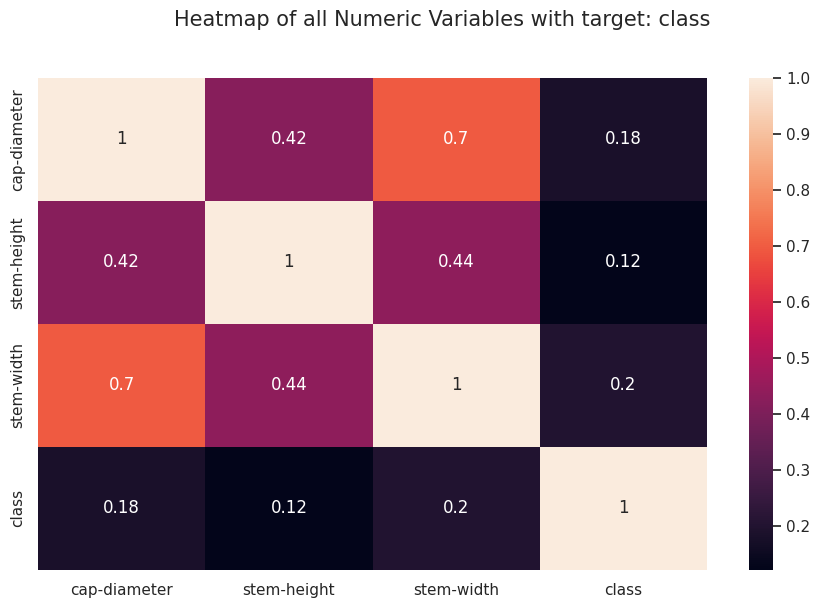

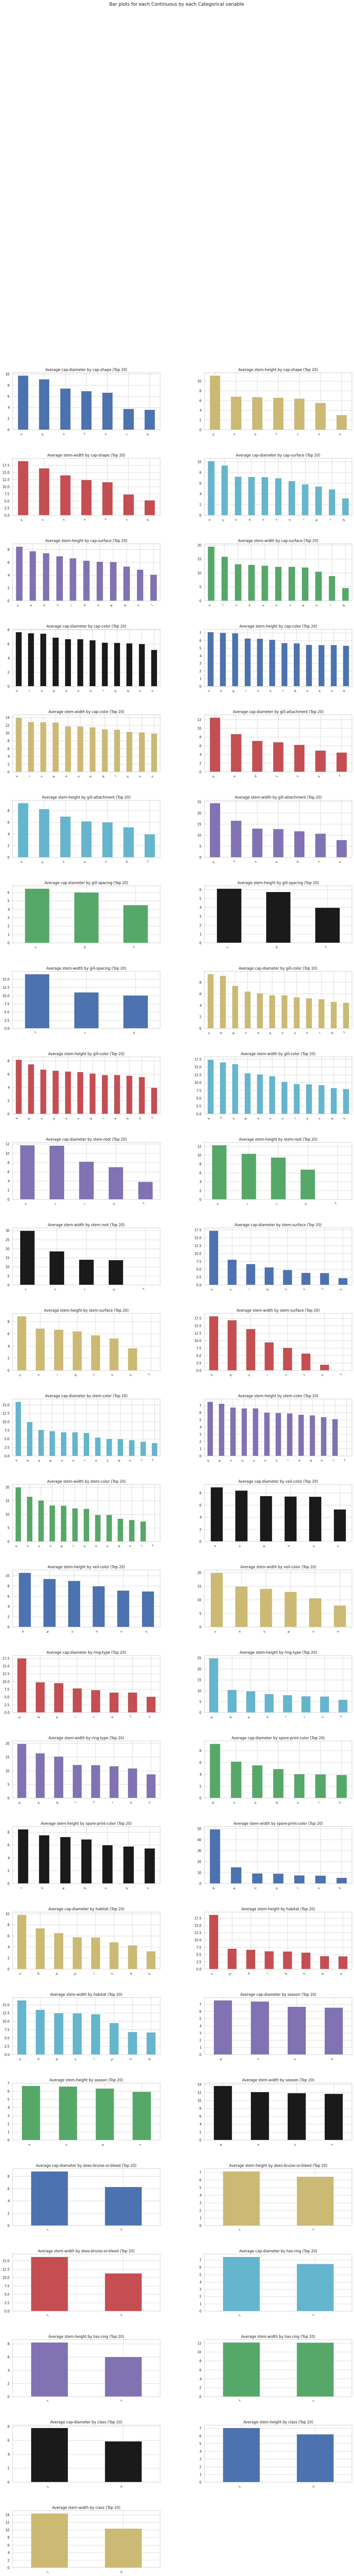

All Plots done
Time to run AutoViz = 56 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
from autoviz import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()

filename = "/content/Data (1).csv"
target_variable = "class"

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

Shape of your Data Set loaded: (173, 23)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  19
    22 Predictors classified...
        20 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['name', 'cap-shape', 'Cap-surface', 'cap-color', 'does-bruise-or-b

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
family,object,0.000000,22,,,"8 rare categories: ['Chanterelle Family', 'Oyster Mushroom Family', 'Crepidotus Family', 'Hydnum Family', 'Ear-Pick Family', 'Saddle-Cup Family', 'Morel Family', 'Jelly Discs Family']. Group them into a single category or drop the categories."
cap-diameter,object,0.000000,13,,,"3 rare categories: ['[0.7', '[0.4', '[50]']. Group them into a single category or drop the categories."
class,object,0.000000,1,,,Target column


No continuous var in data set: drawing categorical distribution plots


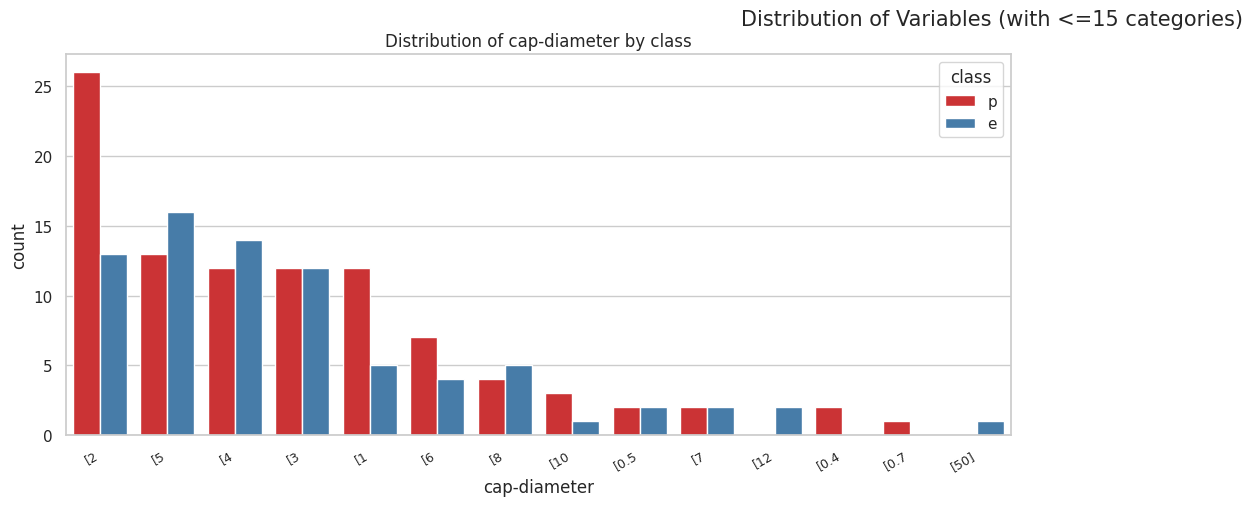

All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


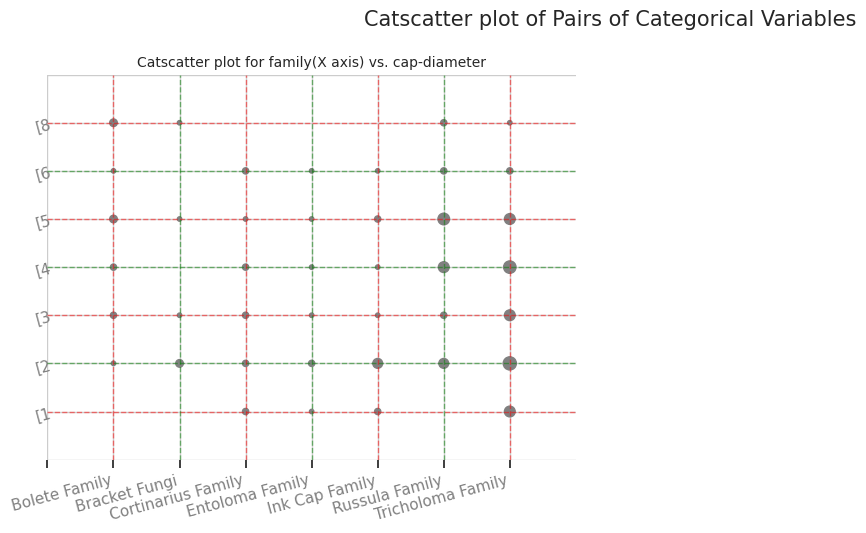

In [ ]:
from autoviz import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()

filename = "/content/Data 2.csv"
target_variable = "class"

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

# Combine both df1 and df2

---



In [ ]:
# Concatenate the two datasets (assuming they have the same columns)
combined_data = pd.concat([df1, df2], ignore_index = True)

In [ ]:
# Display the head of the DataFrame
display(combined_data.head())

In [ ]:
combined_data.head()

In [ ]:
combined_data.tail()

In [ ]:
combined_data.shape

In [ ]:
df3 = combined_data

In [ ]:
# Display the head of the DataFrame
display(df3.head())

In [ ]:
df3.head()

In [ ]:
df3.tail()

In [ ]:
df3.shape

In [ ]:
df3.columns

**Clean special symbol in cap-diameter**

---



In [ ]:
import pandas as pd

# Assume df3 is your DataFrame

# List of columns to check for special characters
columns_to_check = df3.columns

# Regular expression pattern for detecting special characters
special_char_pattern = r'[^a-zA-Z0-9\s.]'

# Check each column for special characters
for column in columns_to_check:
    has_special_chars = df3[column].astype(str).str.contains(special_char_pattern).any()
    if has_special_chars:
        print(f"Column '{column}' contains special characters.")
    else:
        print(f"Column '{column}' does not contain special characters.")


there re special characters in other columns too

In [ ]:
# Function to clean symbols using regular expressions
def clean_symbols(text):
    # Define the regular expression pattern for symbols
    pattern = r'[^a-zA-Z0-9\s.]'
    # Use regex to replace symbols with an empty string
    cleaned_text = pd.Series(text).replace(pattern, '', regex=True).iloc[0]
    return cleaned_text

# Specify columns to clean and convert to numeric
columns_to_clean = ['cap-diameter','cap-shape', 'cap-color','does-bruise-or-bleed','gill-attachment','gill-color','stem-height','family','name','Cap-surface']

# Apply the cleaning function to the specified columns
for column in columns_to_clean:
    df3[column] = df3[column].apply(clean_symbols)
    # Convert the cleaned values to numeric (replace non-numeric values with NaN)
    #df[column] = pd.to_numeric(df[column], errors='coerce')

# Display the cleaned and numeric DataFrame
print(df3)

In [ ]:
# Display the cleaned DataFrame
display(df3)

In [ ]:
display(df3.head())

In [ ]:
df3.head()

In [ ]:
df3.tail()

In [ ]:
df3.columns

In [ ]:
# Drop columns
df3 = df3.drop(['Cap-surface','gill-spacing','spore-print-color','Spore-print-color'], axis=1)

In [ ]:
df3.shape

In [ ]:
df3.columns

In [ ]:
df3.isnull().sum()

In [ ]:
df3.isna().sum()

In [ ]:
df3.isnull().sum()/len(df3)*100

In [ ]:
# Create a heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(df3.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Display the heatmap
display(plt.show())

In [ ]:
sns.heatmap(df3.isnull(), yticklabels = False, cbar=False)

There are null values

In [ ]:
display(df3.info())

In [ ]:
df3.info()

In [ ]:
# Convert 'cap-diameter' to numeric
df3['cap-diameter'] = pd.to_numeric(df3['cap-diameter'], errors='coerce')

# Convert 'stem-height' to numeric
df3['stem-height'] = pd.to_numeric(df3['stem-height'], errors='coerce')

# Convert 'stem-width' to numeric
df3['stem-width'] = pd.to_numeric(df3['stem-width'], errors = 'coerce')


In [ ]:
# Display the modified DataFrame
display(df3)

In [ ]:
df3.head()

In [ ]:
df3.dtypes

**# Handling missing data with char variable**

---



In [ ]:
df3['class'] = df3['class'].fillna(df3['class'].mode()[0])
#df3['cap-diameter'] = df3['cap-diameter'].fillna(df3['cap-diameter'].mode()[0])
df3['cap-shape'] = df3['cap-shape'].fillna(df3['cap-shape'].mode()[0])
df3['cap-surface'] = df3['cap-surface'].fillna(df3['cap-surface'].mode()[0])
df3['cap-color'] = df3['cap-color'].fillna(df3['cap-color'].mode()[0])
df3['does-bruise-or-bleed'] = df3['does-bruise-or-bleed'].fillna(df3['does-bruise-or-bleed'].mode()[0])
df3['gill-attachment'] = df3['gill-attachment'].fillna(df3['gill-attachment'].mode()[0])
df3['gill-color'] = df3['gill-color'].fillna(df3['gill-color'].mode()[0])
#df3['stem-height'] = df3['stem-height'].fillna(df3['stem-height'].mode()[0])
df3['stem-root'] = df3['stem-root'].fillna(df3['stem-root'].mode()[0])
df3['stem-surface'] = df3['stem-surface'].fillna(df3['stem-surface'].mode()[0])
df3['stem-color'] = df3['stem-color'].fillna(df3['stem-color'].mode()[0])
df3['veil-type'] = df3['veil-type'].fillna(df3['veil-type'].mode()[0])
df3['veil-color'] = df3['veil-color'].fillna(df3['veil-color'].mode()[0])
df3['has-ring'] = df3['has-ring'].fillna(df3['has-ring'].mode()[0])
df3['ring-type'] = df3['ring-type'].fillna(df3['ring-type'].mode()[0])
df3['habitat'] = df3['habitat'].fillna(df3['habitat'].mode()[0])
df3['season'] = df3['season'].fillna(df3['season'].mode()[0])
df3['family'] = df3['family'].fillna(df3['family'].mode()[0])
df3['name'] = df3['name'].fillna(df3['name'].mode()[0])







Handling NAN values in Float

---



In [ ]:
df3['cap-diameter'] = df3['cap-diameter'].fillna(df3['cap-diameter'].median())
df3['stem-height'] = df3['stem-height'].fillna(df3['stem-height'].median())
df3['stem-width'] = df3['stem-width'].fillna(df3['stem-width'].median())

In [ ]:
# Display the modified DataFrame
display(df3)

In [ ]:
df3.head()

In [ ]:
display(df3.tail())

In [ ]:
df3.isnull().sum()/len(df3)*100

In [ ]:
df3.isna().sum()

In [ ]:
df3.isna().any()

Now there are no null values and nan values

In [ ]:
!pip install missingno


In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values using the matrix plot
msno.matrix(df3)
plt.show()

# Optionally, you can also use the bar plot
msno.bar(df3)
plt.show()


In [ ]:
df3.duplicated().sum()

In [ ]:
row, column = df3[df3.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

In [ ]:
# Check for duplicates in each column and print the percentage
for column in df3.columns:
    duplicates_percentage = df3[column].duplicated().sum() / len(df3) * 100
    print(f"Column '{column}': {duplicates_percentage:.2f}% duplicates")


There are duplicates so we are removing them

In [ ]:
# Print duplicate rows before dropping
print("Duplicate Rows Before:")
print(df3[df3.duplicated()])

# Drop duplicates based on all columns
print(f'Duplicates in Mushroom data : {df3.iloc[:,1:].duplicated().sum()},({np.round(100*df3.iloc[:,1:].duplicated().sum()/len(df3),1)}%)')
#df3= df3.drop_duplicates(subset=df3.columns[1:], keep='first')
df3.drop(df3[df3.duplicated()].index, inplace=True)

# Print duplicate rows after dropping
print("Duplicate Rows After:")
print(df3[df3.duplicated()])


In [ ]:
df3.duplicated().sum()

In [ ]:
# Check for duplicates in the entire DataFrame
duplicates_percentage = df3.duplicated().sum() / len(df3) * 100
print(f"Overall Duplicates: {duplicates_percentage:.2f}%")


Now there are no duplicates

In [ ]:
# Display the head of the DataFrame
display(df3.head())

In [ ]:
df3.head()

In [ ]:
# check for null values percentage
df3.isnull().mean()*100

In [ ]:
import plotly.express as px

# Assuming 'class' is a column in df3
class_x = df3['class'].value_counts().keys().tolist()
class_y = df3['class'].value_counts().values.tolist()

fig = px.pie(df3, labels=class_x, values=class_y,
             color_discrete_sequence=['grey', 'red'], hole=0.6)

fig.update_layout(title="Mushroom Classes", template="plotly_dark")
fig.show()


In [ ]:
# Check unique values in the 'class' column
unique_classes = df3['class'].unique()
print("Unique Classes:", unique_classes)

# Calculate and print the count for each class
class_counts = df3['class'].value_counts()

# Print the count for each class
for unique_class in unique_classes:
    print(f"Count of {unique_class.capitalize()} Mushrooms:", class_counts[unique_class])


In [ ]:
# Check unique values in the 'class' column
unique_classes = df3['class'].unique()
print("Unique Classes:", unique_classes)

# Calculate and print the count for each class
class_counts = df3['class'].value_counts()

# Print the count for each class
for unique_class in unique_classes:
    if unique_class == 'p':
        print("Count of Poisonous Mushrooms:", class_counts[unique_class])
    elif unique_class == 'e':
        print("Count of Edible Mushrooms:", class_counts[unique_class])


In [ ]:
# Calculate and print the percentage for each class
for unique_class in unique_classes:
    percentage = (class_counts[unique_class] / len(df3['class'])) * 100
    print(f"Percentage of {unique_class.capitalize()} Mushrooms: {percentage:.2f}%")


In [ ]:
# Calculate and print the percentage for each class
class_percentage = df3['class'].value_counts(normalize=True) * 100

# Print the percentage for each class
print(f"Percentage of Edible Mushrooms: {class_percentage['e']:.2f}%")
print(f"Percentage of Poisonous Mushrooms: {class_percentage['p']:.2f}%")


In [ ]:
df3.columns

In [ ]:
df3.info()

In [ ]:
df3.dtypes

# **EDA**

---



In [ ]:
# Display descriptive statistics of the DataFrame
display(df3.describe())

In [ ]:
df3.describe()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate the summary statistics
summary_stats = df3.describe().T

# Set the color palette
cmap = sns.color_palette("Set1", as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(summary_stats, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
plt.title('Summary Statistics Heatmap')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df3 is your DataFrame

# Calculate counts of each class
class_counts = df3['class'].value_counts()

# Extract labels and counts from the value counts
labels = class_counts.index
counts = class_counts.values

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts)
plt.xlabel("Class Type")
plt.ylabel("Count")
plt.title("Distribution of Class in Different Categories")
# Display the plot
display(plt.show())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df3 is your DataFrame

# Calculate counts of each class
class_counts = df3['class'].value_counts()

# Extract labels and counts from the value counts
labels = class_counts.index
counts = class_counts.values

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts)

# Add count labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel("Class Type")
plt.ylabel("Count")
plt.title("Distribution of Class in Different Categories")

# Display the plot
plt.show()


There is class imbalances.That we are going to deal by SMOTE.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df3 is your DataFrame

# Select numeric columns for distribution analysis
numeric_columns = ['cap-diameter', 'stem-height', 'stem-width']

# Iterate through numeric columns and create distribution plots
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df3, x=column, hue='class', multiple='stack', kde=True, bins=30)
    plt.title(f'Distribution of {column} in Different Classes')
    # Display the plot
    display(plt.show())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming df3 is your DataFrame

# Select categorical and numeric columns
categorical_columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'habitat', 'season', 'family', 'name']
numeric_columns = ['cap-diameter', 'stem-height', 'stem-width']

# Plot bar chart for categorical columns
plt.figure(figsize=(12, 6))
for column in categorical_columns:
    sns.countplot(data=df3, x=column)
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Distribution of {column}")
    display(plt.show())

# Plot bar chart for labels of numeric columns
plt.figure(figsize=(12, 6))
for column in numeric_columns:
    sns.barplot(data=df3, x='class', y=column)
    plt.xlabel("Class Type")
    plt.ylabel(f"{column} (Label)")
    plt.title(f"Distribution of {column} Labels in Different Classes")
    display(plt.show())


In [ ]:
import altair as alt
import pandas as pd

# Assuming df3 is your DataFrame

# Select categorical and numeric columns
categorical_columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'habitat', 'season', 'family', 'name']
numeric_columns = ['cap-diameter', 'stem-height', 'stem-width']

# Function to aggregate data for a column
def aggregate_data(df, column, chart_type):
    if chart_type == 'categorical':
        aggregated_data = df.groupby(column).size().reset_index(name='count')
    elif chart_type == 'numeric':
        aggregated_data = df.groupby('class')[column].mean().reset_index(name=column)
    return aggregated_data

# Function to create Altair chart for aggregated data
def create_chart(aggregated_data, column, chart_type):
    if chart_type == 'categorical':
        chart = alt.Chart(aggregated_data).mark_bar().encode(
            x=alt.X(f'{column}:N', title=f"{column}"),
            y='count:Q',
            color=alt.Color(f'{column}:N', legend=None, scale=alt.Scale(scheme='category20'))
        ).properties(
            width=150,
            height=100,
            title=f"Distribution of {column}"
        )
    elif chart_type == 'numeric':
        chart = alt.Chart(aggregated_data).mark_bar().encode(
            x=alt.X('class:N', title="Class Type"),
            y=alt.Y(f'{column}:Q', title=f"Mean {column} (Label)")
        ).properties(
            width=150,
            height=100,
            title=f"Distribution of {column} Labels in Different Classes"
        )
    return chart

# Create subplots for categorical columns
categorical_charts = [create_chart(aggregate_data(df3, column, 'categorical'), column, 'categorical') for column in categorical_columns]

# Create subplots for numeric columns
numeric_charts = [create_chart(aggregate_data(df3, column, 'numeric'), column, 'numeric') for column in numeric_columns]

# Combine all subplots into a single frame
combined_frame = alt.vconcat(alt.hconcat(*categorical_charts[:6]), alt.hconcat(*categorical_charts[6:12]), alt.hconcat(*categorical_charts[12:]), alt.hconcat(*numeric_charts))

# Display the combined frame
combined_frame.display()


In [ ]:
import altair as alt
import pandas as pd

# Assuming df3 is your DataFrame

# Select categorical and numeric columns
categorical_columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'habitat', 'season', 'family', 'name']
numeric_columns = ['cap-diameter', 'stem-height', 'stem-width']

# Function to create Altair chart for aggregated data
def create_chart(aggregated_data, column, chart_type):
    if chart_type == 'categorical':
        chart = alt.Chart(aggregated_data).mark_bar().encode(
            x=alt.X(f'{column}:N', title=f"{column}"),
            y='count:Q',
            color=alt.Color(f'{column}:N', legend=None, scale=alt.Scale(scheme='category20'))
        ).properties(
            width=150,
            height=100,
            title=f"Distribution of {column}"
        )
    elif chart_type == 'numeric':
        chart = alt.Chart(aggregated_data).mark_bar().encode(
            x=alt.X('class:N', title="Class Type"),
            y=alt.Y(f'{column}:Q', title=f"Mean {column} (Label)")
        ).properties(
            width=150,
            height=100,
            title=f"Distribution of {column} Labels in Different Classes"
        )
    return chart

# Create subplots for categorical columns
categorical_charts = [create_chart(aggregate_data(df3, column, 'categorical'), column, 'categorical') for column in categorical_columns]

# Create subplots for numeric columns
numeric_charts = [create_chart(aggregate_data(df3, column, 'numeric'), column, 'numeric') for column in numeric_columns]

# Combine all subplots into a single frame
combined_frame = alt.vconcat(alt.hconcat(*categorical_charts[:6]), alt.hconcat(*categorical_charts[6:12]), alt.hconcat(*categorical_charts[12:]), alt.hconcat(*numeric_charts))

# Display the combined frame
combined_frame.display()


Now we have to do EDA and apply SMOTE,STANDARD SCALER,split,then train model

In [ ]:
df3.describe()

In [ ]:
# Customize the appearance using a color palette
import matplotlib.pyplot as plt
styled_summary = df3.describe().T.style.background_gradient(cmap=("Set1"))

# Display the styled summary
styled_summary

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = ['cap-diameter', 'stem-height', 'stem-width']

# Create boxplots for each numeric column
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df3[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


# **OUTLIER TREATMENT FOR NUMERIC VALUES**

---



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def handle_outliers(df, columns):
    df_outliers = df.copy()

    # Iterate through selected numeric columns
    for column in columns:
        # Calculate IQR
        Q1 = df_outliers[column].quantile(0.25)
        Q3 = df_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        # Set a threshold for capping
        threshold = 1.5 * IQR

        # Cap values above the upper bound
        df_outliers[column] = np.where(df_outliers[column] > (Q3 + threshold), (Q3 + threshold), df_outliers[column])
        # Floor values below the lower bound
        df_outliers[column] = np.where(df_outliers[column] < (Q1 - threshold), (Q1 - threshold), df_outliers[column])

    return df_outliers

# Select specific numeric columns
numeric_columns_to_handle = ['cap-diameter', 'stem-height', 'stem-width']

# Before handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df3[numeric_columns_to_handle])
plt.title('Box Plot - Before Handling Outliers')

# Apply the handle_outliers function to specific columns
df3_outliers_handled = handle_outliers(df3, numeric_columns_to_handle)

# After handling outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df3_outliers_handled[numeric_columns_to_handle])
plt.title('Box Plot - After Handling Outliers')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame
categorical_columns = ['cap-color', 'has-ring', 'gill-color', 'stem-root']  # Add more columns as needed

# Determine the number of rows and columns for subplots
num_columns = 2  # You can adjust this based on how many subplots you want in each row
num_rows = -(-len(categorical_columns) // num_columns)  # Ceiling division

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 8))
fig.suptitle('Countplots for Categorical Variables in df3', y=1.02)

for i, col in enumerate(categorical_columns):
    row_num = i // num_columns
    col_num = i % num_columns

    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]

    sns.countplot(x=col, data=df3, ax=ax)
    ax.set_title(f'Countplot for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Remove empty subplots if any
for i in range(len(categorical_columns), num_rows * num_columns):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame
categorical_columns = ['cap-color', 'has-ring', 'gill-color', 'stem-root']  # Add more columns as needed

# Determine the number of rows and columns for subplots
num_columns = 2  # You can adjust this based on how many subplots you want in each row
num_rows = -(-len(categorical_columns) // num_columns)  # Ceiling division

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 8))
fig.suptitle('Clustered Bar Charts for Categorical Variables in df3', y=1.02)

for i, col in enumerate(categorical_columns):
    row_num = i // num_columns
    col_num = i % num_columns

    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]

    sns.countplot(x=col, hue='class', data=df3, ax=ax)
    ax.set_title(f'{col} vs Class')

# Remove empty subplots if any
for i in range(len(categorical_columns), num_rows * num_columns):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'habitat', 'season', 'family', 'name']


# Assuming df3 is your DataFrame
for col in categorical_columns:
    plt.figure(figsize=(12, 8))
    sns.heatmap(pd.crosstab(df3[col], df3['class'], margins=True), annot=True, cmap='coolwarm', fmt='d')
    plt.title(f'Mosaic Plot for {col}')
    plt.show()


In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df3 is your DataFrame
categorical_columns = ['cap-color', 'has-ring', 'gill-color', 'stem-root']  # Add more columns as needed

# Determine the number of rows and columns for subplots
num_columns = 2  # You can adjust this based on how many subplots you want in each row
num_rows = -(-len(categorical_columns) // num_columns)  # Ceiling division

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 8))
fig.suptitle('Mosaic Plots for Categorical Variables in df3', y=1.02)

for i, col in enumerate(categorical_columns):
    row_num = i // num_columns
    col_num = i % num_columns

    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]

    mosaic_df = pd.crosstab(df3[col], df3['class']).stack().reset_index(name='count')
    mosaic_df.rename(columns={'class': 'class_variable'}, inplace=True)
    mosaic(mosaic_df, [col, 'class_variable'], ax=ax)

    ax.set_title(f'Mosaic Plot for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Class')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Remove empty subplots if any
for i in range(len(categorical_columns), num_rows * num_columns):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

for col in categorical_columns:
    mosaic_df = pd.crosstab(df3[col], df3['class']).stack().reset_index(name='count')
    mosaic_df.rename(columns={'class': 'class_variable'}, inplace=True)
    mosaic(mosaic_df, [col, 'class_variable'], title=f'Mosaic Plot for {col}')
    plt.show()


**Correlation Heatmap**

---



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df3[categorical_columns].apply(lambda x: pd.factorize(x)[0]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Categorical Columns')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_columns:
    sns.countplot(x=col, data=df3)
    plt.title(f'Countplot for {col}')
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='cap-color', hue='has-ring', data=df3)
plt.title('Clustered Bar Chart for Cap Color and Has Ring in df3')
plt.show()


In [ ]:
!pip install holoviews

In [ ]:
import holoviews as hv
import pandas as pd
from holoviews import opts

hv.extension('bokeh')

# Assuming df3 is your DataFrame
categorical_columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'habitat', 'season', 'family', 'name']
numeric_columns = ['cap-diameter', 'stem-height', 'stem-width']

# Function to create bar chart for categorical variables
def create_bar_chart(column):
    return hv.Bars(df3.groupby([column]).size().reset_index(name='count'), kdims=[column], vdims='count').opts(
        title=f'Bar Chart for {column}',
        width=400,
        height=300,
        xrotation=45,
        show_legend=False
    )

# Function to create scatter plot matrix for numeric variables
def create_scatter_matrix():
    scatter_matrix = hv.Layout([
        hv.Scatter(df3, kdims=[col1], vdims=[col2]).opts(
            title=f'Scatter Plot: {col1} vs {col2}',
            width=300,
            height=300,
        )
        for col1 in numeric_columns
        for col2 in numeric_columns
        if col1 != col2
    ]).cols(3)

    return scatter_matrix

# Create bar charts for categorical variables
bar_charts = [create_bar_chart(col) for col in categorical_columns]

# Create scatter plot matrix for numeric variables
scatter_matrix = create_scatter_matrix()

# Display the plots
bar_charts_layout = hv.Layout(bar_charts).cols(3)
layout = (bar_charts_layout + scatter_matrix).opts(shared_axes=False)

layout


**Using autoviz again for df3**

---



In [ ]:
# Assuming df3 is your DataFrame
df3.to_csv("df3output_file.csv", index=False)


In [ ]:
df3

In [ ]:
from autoviz import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()

filename = "/content/df3output_file.csv"
target_variable = "class"

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

In [ ]:
df3.head()

In [ ]:
df3.dtypes

# **USE ENCODING TECHNIQUE - LABEL ENCODING**

---



In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df1 is your DataFrame

# Label Encoding for "Car", "Fueltype", and "Transmission"
label_encoder = LabelEncoder()

df3['class'] = label_encoder.fit_transform(df3['class'])
df3['cap-shape'] = label_encoder.fit_transform(df3['cap-shape'])
df3['cap-surface'] = label_encoder.fit_transform(df3['cap-surface'])
df3['cap-color'] = label_encoder.fit_transform(df3['cap-color'])
df3['does-bruise-or-bleed'] = label_encoder.fit_transform(df3['does-bruise-or-bleed'])
df3['gill-attachment'] = label_encoder.fit_transform(df3['gill-attachment'])
df3['gill-color'] = label_encoder.fit_transform(df3['gill-color'])
df3['stem-root'] = label_encoder.fit_transform(df3['stem-root'])
df3['stem-surface'] =label_encoder.fit_transform(df3['stem-surface'])
df3['stem-color'] = label_encoder.fit_transform(df3['stem-color'])
df3['veil-type'] = label_encoder.fit_transform(df3['veil-type'])
df3['veil-color'] = label_encoder.fit_transform(df3['veil-color'])
df3['has-ring'] = label_encoder.fit_transform(df3['has-ring'])
df3['ring-type'] = label_encoder.fit_transform(df3['ring-type'])
df3['habitat'] = label_encoder.fit_transform(df3['habitat'])
df3['season'] = label_encoder.fit_transform(df3['season'])


# Display the updated DataFrame
df3.head()

In [ ]:
df3.tail()

# **Use standard scaler**

---



In [ ]:
df3.dtypes

**standard scaler**

---



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_columns = ['cap-diameter','stem-height','stem-width']
df3[scaler_columns] = scaler.fit_transform(df3[scaler_columns])

In [ ]:
df3.head()

# **SPLIT DATA INTO X AND Y INDEPENDENT AND DEPENDENT VARIABLES**

---



In [ ]:
x = df3.drop(['class','family','name'], axis =1)
y= df3['class']

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
x.shape

In [ ]:
y.shape

 This is imbalance data since target is minority class.so we use the technique SMOTE.

# **SMOTE**

---



In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)
print(y.value_counts())
print("***************"*10)
print(y_smote.value_counts())

In [ ]:
print(x.value_counts())
print("***************"*10)
print(x_smote.value_counts())

In [ ]:
print(x.shape)
print(x_smote.shape)

In [ ]:
print(y.shape)
print(y_smote.shape)

Now there is no class imbalances

**Balanced and imbalanced data**

---



In [ ]:
print("imbalance data\n", y.value_counts())
print("balanced data\n", y_smote.value_counts())

# **SPLIT TRAIN AND TEST DATA FOR MODEL BUILDING**

---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, random_state=101)

**EDA WITH SWEETVIZ**

---



In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz
reports = sweetviz.analyze([df3 , 'Train'],target_feat = 'class')
reports.show_html('sweetzreport.html')

# **MODEL BUILDING**

---



# **LOGISTIC REGRESSION**

---



In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

**Predictions**

---



In [ ]:
# Make predictions on the train and test data
y_pred_logit_train = logit.predict(x_train)
y_pred_logit_test = logit.predict(x_test)


**Evaluate Model**

---



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
#Classification Report with Train and Test Data
print(classification_report(y_train,y_pred_logit_train))
print("***********************************************"*10)
print(classification_report(y_test,y_pred_logit_test))

In [ ]:
print("Training Accuracy of Logistic Regression is {:.2f}%".format(accuracy_score(y_train, y_pred_logit_train)*100))
print("***************"*10)
print("Test Accuracy of Logistic Regressione is {:.2f}%".format(accuracy_score(y_test, y_pred_logit_test)*100))

**Confusion matrix for Train and Test Data**

---



In [ ]:
print("confusion_matrix:\n",confusion_matrix(y_train, y_pred_logit_train))

In [ ]:
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred_logit_test))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test is the true labels for x_test

# Calculate the confusion matrix for the test set predictions
conf_matrix_test = confusion_matrix(y_test, y_pred_logit_test)

# Calculate other evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred_logit_test)
classification_rep_test = classification_report(y_test, y_pred_logit_test)

# Plot confusion matrix
plt.figure(figsize=(12, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Subplot 2: Additional Metrics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Accuracy: {accuracy_test:.2f}\n\nClassification Report:\n{classification_rep_test}",
         fontsize=12, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming y_train is the true labels for x_train and y_pred_logit_train is the predicted labels for Logistic Regression
# Assuming y_test is the true labels for x_test and y_pred_logit_test is the predicted labels for Logistic Regression

# Calculate the confusion matrix for the training set predictions (for Logistic Regression)
conf_matrix_train_logit = confusion_matrix(y_train, y_pred_logit_train)

# Calculate other evaluation metrics (for Logistic Regression)
accuracy_train_logit = accuracy_score(y_train, y_pred_logit_train)
classification_rep_train_logit = classification_report(y_train, y_pred_logit_train)

# Extract values from confusion matrix
tn_logit, fp_logit, fn_logit, tp_logit = conf_matrix_train_logit.ravel()

# Plot confusion matrix and additional metrics for Logistic Regression
plt.figure(figsize=(12, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_logit, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix (Training Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.text(0.5, 2.5, f'True Negatives: {tn_logit}\nFalse Positives: {fp_logit}\nFalse Negatives: {fn_logit}\nTrue Positives: {tp_logit}',
         fontsize=12, ha='center', va='center', color='red', fontweight='bold')

# Subplot 2: Additional Metrics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Accuracy: {accuracy_train_logit:.2f}\n\nClassification Report:\n{classification_rep_train_logit}",
         fontsize=12, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print overall training and testing accuracy for Logistic Regression
print("Training Accuracy of Logistic Regression is {:.2f}%".format(accuracy_train_logit * 100))
print("***************" * 10)
print("Test Accuracy of Logistic Regression is {:.2f}%".format(accuracy_score(y_test, y_pred_logit_test) * 100))


**Ridge classifier**

---



In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
ridge_classifier = RidgeClassifier(alpha=1.0)
# Fit the model
ridge_classifier.fit(x_train, y_train)

**Predictions for train and test by RIDGE CLASSIFIER**

---



In [ ]:
# Make predictions for train and test data
y_pred_train_rc = ridge_classifier.predict(x_train)
y_pred_test_rc = ridge_classifier.predict(x_test)

**Evaluate Model RC**

---



In [ ]:
#Classification Report with Train and Test Data
print(classification_report(y_train,y_pred_train_rc))
print("***********************************************"*10)
print(classification_report(y_test,y_pred_test_rc))

In [ ]:
print("Training Accuracy of Ridge classifier is {:.2f}%".format(accuracy_score(y_train, y_pred_train_rc)*100))
print("***************"*10)
print("Test Accuracy of Ridge classifier is {:.2f}%".format(accuracy_score(y_test, y_pred_test_rc)*100))

**Confusion Matric for train and test data by RC**

---



In [ ]:
print("confusion_matrix:\n",confusion_matrix(y_train, y_pred_train_rc))


In [ ]:
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred_test_rc))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_train is the true labels for x_train and y_pred_train_dt is the predicted labels

# Calculate the confusion matrix for the training set predictions (for Decision Tree)
conf_matrix_train_rc = confusion_matrix(y_train, y_pred_train_rc)

# Calculate other evaluation metrics (for Ridge classifier)
accuracy_train_rc = accuracy_score(y_train, y_pred_train_rc)
classification_rep_train_rc = classification_report(y_train, y_pred_train_rc)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix_train_rc.ravel()

# Plot confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_rc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ridge Classifier Confusion Matrix (Training Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.text(0.5, 2.5, f'True Negatives: {tn}\nFalse Positives: {fp}\nFalse Negatives: {fn}\nTrue Positives: {tp}',
         fontsize=12, ha='center', va='center', color='red', fontweight='bold')

# Subplot 2: Additional Metrics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Accuracy: {accuracy_train_rc:.2f}\n\nClassification Report:\n{classification_rep_train_rc}",
         fontsize=12, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test is the true labels for x_test and y_pred_test_dt is the predicted labels

# Calculate the confusion matrix for the test set predictions (for Ridge classifier)
conf_matrix_test_rc = confusion_matrix(y_test, y_pred_test_rc)

# Calculate other evaluation metrics (for Ridge classifier)
accuracy_test_rc = accuracy_score(y_test, y_pred_test_rc)
classification_rep_test_rc = classification_report(y_test, y_pred_test_rc)

# Extract values from confusion matrix
tn_test, fp_test, fn_test, tp_test = conf_matrix_test_rc.ravel()

# Plot confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_test_rc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ridge classifier Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.text(0.5, 2.5, f'True Negatives: {tn_test}\nFalse Positives: {fp_test}\nFalse Negatives: {fn_test}\nTrue Positives: {tp_test}',
         fontsize=12, ha='center', va='center', color='red', fontweight='bold')

# Subplot 2: Additional Metrics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Accuracy: {accuracy_test_rc:.2f}\n\nClassification Report:\n{classification_rep_test_rc}",
         fontsize=12, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()



**Feature importance for Train**

---



In [ ]:
# Get feature coefficients
feature_coefficients = pd.Series(ridge_classifier.coef_[0], index=x_train.columns)

In [ ]:
feature_coefficients

**Feature importances for Test by RC**

---



In [ ]:
# Get feature coefficients
feature_coefficients_test = pd.Series(ridge_classifier.coef_[0], index=x_test.columns)

In [ ]:
feature_coefficients_test

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained the Ridge Classifier and obtained the coefficients
# Make sure to replace ridge_classifier with the actual instance of your trained Ridge Classifier
# and x_test with your actual test feature set
feature_coefficients_test = pd.Series(ridge_classifier.coef_[0], index=x_test.columns)

# Sorting the coefficients for better visualization
sorted_coefficients_test = feature_coefficients_test.abs().sort_values(ascending=False)

# Plotting the top N coefficients
top_n = 10  # Change this value based on how many top features you want to visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_coefficients_test.head(top_n).index, y=sorted_coefficients_test.head(top_n))
plt.xticks(rotation=45, ha='right')
plt.title('Top Feature Coefficients in Ridge Classifier (Test Data)')
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.show()


**Feature importance for edible and poisonous Mushrooms using Ridge classifier**

---



In [ ]:
# Create a DataFrame to store feature names and their coefficients
feature_coefficients_df = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': ridge_classifier.coef_[0]})

In [ ]:
# Separate the coefficients for edible and poisonous classes
coefficients_edible = feature_coefficients_df[feature_coefficients_df['Coefficient'] > 0]
coefficients_poisonous = feature_coefficients_df[feature_coefficients_df['Coefficient'] < 0]

# Plot the top N coefficients for each class
top_n = 10  # Change this value based on how many top features you want to visualize
plt.figure(figsize=(12, 6))

# Plotting top N coefficients for Edible
plt.subplot(1, 2, 1)
sns.barplot(x='Coefficient', y='Feature', data=coefficients_edible.nlargest(top_n, 'Coefficient'))
plt.title('Top Feature Coefficients for Edible Mushrooms')

# Plotting top N coefficients for Poisonous
plt.subplot(1, 2, 2)
sns.barplot(x='Coefficient', y='Feature', data=coefficients_poisonous.nsmallest(top_n, 'Coefficient'))
plt.title('Top Feature Coefficients for Poisonous Mushrooms')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained the Ridge Classifier and obtained the coefficients
feature_coefficients = pd.Series(ridge_classifier.coef_[0], index=x_train.columns)

# Sorting the coefficients for better visualization
sorted_coefficients = feature_coefficients.abs().sort_values(ascending=False)

# Plotting the top N coefficients
top_n = 10  # Change this value based on how many top features you want to visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_coefficients.head(top_n).index, y=sorted_coefficients.head(top_n))
plt.xticks(rotation=45, ha='right')
plt.title('Top Feature Coefficients in Ridge Classifier')
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.show()


**Naive Bayes**

---



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Initialize Gaussian Naive Bayes model
nb = GaussianNB()

# Fit the model
nb.fit(x_train, y_train)

**Predictions for train and test by NB**

---



In [ ]:
# Make predictions on the train and test data
y_pred_train_nb = nb.predict(x_train)
y_pred_test_nb = nb.predict(x_test)

**Evaluate model NB**

---



In [ ]:
#Classification Report with Train and Test Data
print(classification_report(y_train,y_pred_train_nb))
print("***********************************************"*10)
print(classification_report(y_test,y_pred_test_nb))

In [ ]:
print("Training Accuracy of NB is {:.2f}%".format(accuracy_score(y_train, y_pred_train_nb)*100))
print("***************"*10)
print("Test Accuracy of NB is {:.2f}%".format(accuracy_score(y_test, y_pred_test_nb)*100))

**Confusion Matrix for train and test data NB**

---



In [ ]:
print("confusion_matrix:\n",confusion_matrix(y_train, y_pred_train_nb))

In [ ]:
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred_test_nb))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test is the true labels for x_test and y_pred_test_dt is the predicted labels

# Calculate the confusion matrix for the test set predictions (for Naive Bayes)
conf_matrix_test_nb = confusion_matrix(y_test, y_pred_test_nb)

# Calculate other evaluation metrics (for Naive Bayes)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)
classification_rep_test_nb = classification_report(y_test, y_pred_test_nb)

# Extract values from confusion matrix
tn_test, fp_test, fn_test, tp_test = conf_matrix_test_nb.ravel()

# Plot confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_test_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.text(0.5, 2.5, f'True Negatives: {tn_test}\nFalse Positives: {fp_test}\nFalse Negatives: {fn_test}\nTrue Positives: {tp_test}',
         fontsize=12, ha='center', va='center', color='red', fontweight='bold')

# Subplot 2: Additional Metrics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Accuracy: {accuracy_test_nb:.2f}\n\nClassification Report:\n{classification_rep_test_nb}",
         fontsize=12, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_train is the true labels for x_train and y_pred_train_dt is the predicted labels

# Calculate the confusion matrix for the training set predictions (for Naive Bayes)
conf_matrix_train_nb = confusion_matrix(y_train, y_pred_train_nb)

# Calculate other evaluation metrics (for Naive Bayes)
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
classification_rep_train_nb = classification_report(y_train, y_pred_train_nb)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix_train_nb.ravel()

# Plot confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix (Training Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.text(0.5, 2.5, f'True Negatives: {tn}\nFalse Positives: {fp}\nFalse Negatives: {fn}\nTrue Positives: {tp}',
         fontsize=12, ha='center', va='center', color='red', fontweight='bold')

# Subplot 2: Additional Metrics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Accuracy: {accuracy_train_nb:.2f}\n\nClassification Report:\n{classification_rep_train_nb}",
         fontsize=12, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()


**Decision Tree Classifier**

---



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

**Predictions for train and  test by DT**

---



In [ ]:
# Make predictions on the train and test data
y_pred_train_dt = dt.predict(x_train)
y_pred_test_dt = dt.predict(x_test)

**Evaluate Model DT**

---



In [ ]:
#Classification Report with Train and Test Data
print(classification_report(y_train,y_pred_train_dt))
print("***********************************************"*10)
print(classification_report(y_test,y_pred_test_dt))

In [ ]:
print("Training Accuracy of Decision Tree is {:.2f}%".format(accuracy_score(y_train, y_pred_train_dt)*100))
print("***************"*10)
print("Test Accuracy of Decision Tree is {:.2f}%".format(accuracy_score(y_test, y_pred_test_dt)*100))

**confusion Matrix for Train and Test data**

---



In [ ]:
print("confusion_matrix:\n",confusion_matrix(y_train, y_pred_train_dt))

In [ ]:
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred_test_dt))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test is the true labels for x_test

# Calculate the confusion matrix for the test set predictions (for Decision Tree)
conf_matrix_test_dt = confusion_matrix(y_test, y_pred_test_dt)

# Calculate other evaluation metrics (for Decision Tree)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
classification_rep_test_dt = classification_report(y_test, y_pred_test_dt)

# Plot confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_test_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Subplot 2: Additional Metrics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Accuracy: {accuracy_test_dt:.2f}\n\nClassification Report:\n{classification_rep_test_dt}",
         fontsize=12, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_train is the true labels for x_train

# Calculate the confusion matrix for the training set predictions (for Decision Tree)
conf_matrix_train_dt = confusion_matrix(y_train, y_pred_train_dt)

# Calculate other evaluation metrics (for Decision Tree)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
classification_rep_train_dt = classification_report(y_train, y_pred_train_dt)

# Plot confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix (Training Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Subplot 2: Additional Metrics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Accuracy: {accuracy_train_dt:.2f}\n\nClassification Report:\n{classification_rep_train_dt}",
         fontsize=12, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_train is the true labels for x_train and y_pred_train_dt is the predicted labels

# Calculate the confusion matrix for the training set predictions (for Decision Tree)
conf_matrix_train_dt = confusion_matrix(y_train, y_pred_train_dt)

# Calculate other evaluation metrics (for Decision Tree)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
classification_rep_train_dt = classification_report(y_train, y_pred_train_dt)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix_train_dt.ravel()

# Plot confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix (Training Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.text(0.5, 2.5, f'True Negatives: {tn}\nFalse Positives: {fp}\nFalse Negatives: {fn}\nTrue Positives: {tp}',
         fontsize=12, ha='center', va='center', color='red', fontweight='bold')

# Subplot 2: Additional Metrics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Accuracy: {accuracy_train_dt:.2f}\n\nClassification Report:\n{classification_rep_train_dt}",
         fontsize=12, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test is the true labels for x_test and y_pred_test_dt is the predicted labels

# Calculate the confusion matrix for the test set predictions (for Decision Tree)
conf_matrix_test_dt = confusion_matrix(y_test, y_pred_test_dt)

# Calculate other evaluation metrics (for Decision Tree)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
classification_rep_test_dt = classification_report(y_test, y_pred_test_dt)

# Extract values from confusion matrix
tn_test, fp_test, fn_test, tp_test = conf_matrix_test_dt.ravel()

# Plot confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_test_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.text(0.5, 2.5, f'True Negatives: {tn_test}\nFalse Positives: {fp_test}\nFalse Negatives: {fn_test}\nTrue Positives: {tp_test}',
         fontsize=12, ha='center', va='center', color='red', fontweight='bold')

# Subplot 2: Additional Metrics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Accuracy: {accuracy_test_dt:.2f}\n\nClassification Report:\n{classification_rep_test_dt}",
         fontsize=12, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()



# **Random Forest Model - to handle overfitting (high variance problem)**

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=1000,criterion='entropy',oob_score=True)
rf.fit(x_train, y_train)

**Predictions using RF**

---



In [ ]:
# Make predictions on the train and test data
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf= rf.predict(x_test)

**Evaluate Model RF**

---



In [ ]:
#Classification Report with Train and Test Data
print(classification_report(y_train,y_pred_train_rf))
print("***********************************************"*10)
print(classification_report(y_test,y_pred_test_rf))

**Accuracy of Train and Test using RF**

---



In [ ]:
print("Training Accuracy of Random Forest is {:.2f}%".format(accuracy_score(y_train, y_pred_train_rf)*100))
print("***************"*10)
print("Test Accuracy of Random Forest is {:.2f}%".format(accuracy_score(y_test, y_pred_test_rf)*100))

**Confusion Matrix for Train and Test data**

---



In [ ]:
print("confusion_matrix:\n",confusion_matrix(y_train, y_pred_train_rf))

In [ ]:
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred_test_rf))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_train is the true labels for x_train and y_pred_train_rf is the predicted labels

# Calculate the confusion matrix for the training set predictions (for Random Forest)
conf_matrix_train_rf = confusion_matrix(y_train, y_pred_train_rf)

# Calculate other evaluation metrics (for Random Forest)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
classification_rep_train_rf = classification_report(y_train, y_pred_train_rf)

# Extract values from confusion matrix
tn_train_rf, fp_train_rf, fn_train_rf, tp_train_rf = conf_matrix_train_rf.ravel()

# Plot confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (Training Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.text(0.5, 2.5, f'True Negatives: {tn_train_rf}\nFalse Positives: {fp_train_rf}\nFalse Negatives: {fn_train_rf}\nTrue Positives: {tp_train_rf}',
         fontsize=12, ha='center', va='center', color='red', fontweight='bold')

# Subplot 2: Additional Metrics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Accuracy: {accuracy_train_rf:.2f}\n\nClassification Report:\n{classification_rep_train_rf}",
         fontsize=12, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test is the true labels for x_test and y_pred_test_rf is the predicted labels

# Calculate the confusion matrix for the test set predictions (for Random Forest)
conf_matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)

# Calculate other evaluation metrics (for Random Forest)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
classification_rep_test_rf = classification_report(y_test, y_pred_test_rf)

# Extract values from confusion matrix
tn_test_rf, fp_test_rf, fn_test_rf, tp_test_rf = conf_matrix_test_rf.ravel()

# Plot confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.text(0.5, 2.5, f'True Negatives: {tn_test_rf}\nFalse Positives: {fp_test_rf}\nFalse Negatives: {fn_test_rf}\nTrue Positives: {tp_test_rf}',
         fontsize=12, ha='center', va='center', color='red', fontweight='bold')

# Subplot 2: Additional Metrics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Accuracy: {accuracy_test_rf:.2f}\n\nClassification Report:\n{classification_rep_test_rf}",
         fontsize=12, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()


# **Give Probability**

---



In [ ]:
df3['name'].value_counts()

In [ ]:
df3

# **Predict probability of Poisonous Mushroom**

---



In [ ]:
# Predict probabilities for the positive class
y_prob_rf = rf.predict_proba(x_test)[:, 1]

In [ ]:
print("Predicted probability using RF for class 1 or spam is\n:",y_prob_rf)

# **Poisonous mushrooms**

In [ ]:
df3['Probability1'] = rf.predict_proba(df3[x_test.columns])[:, 1]

In [ ]:
df3['Probability1']

# **Predict probability of Edible Mushrooms**

---



In [ ]:
df3['Probability0'] =rf.predict_proba(df3[x_test.columns])[:, 0]

In [ ]:
df3['Probability0']

In [ ]:
df3.head()

In [ ]:
df3.tail()

# **Predict probabilities for the Poisonous Mushroom in terms of Name and Family**

---



In [ ]:
df3[['family','name','Probability1']].head()

# **Predict probabilities for the Edible Mushroom in terms of Name and Family**

---



In [ ]:
df3[['family','name','Probability0']].head()

In [ ]:
# Assuming rf is your RandomForestClassifier
# Fit the model to your data
rf.fit(x_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df3['name'], df3['Probability1'], c=df3['family'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Name')
plt.ylabel('Probability1')
plt.title('Scatter Plot for Name, Probability1, and Family')
plt.colorbar(label='Family')
plt.show()


# **FEATURE IMPORTANCE FOR EDIBLE AND POISONOUS MUSHROOMS BY RF**

---



In [ ]:
# Assuming 'rf' is your trained RandomForest model
feature_importances = rf.feature_importances_

# Creating a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sorting the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N importances for each class
top_n = 10  # Change this value based on how many top features you want to visualize
plt.figure(figsize=(12, 6))

# Plotting top N importances for Edible
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.nlargest(top_n, 'Importance'))
plt.title('Top Feature Importances for Edible Mushrooms')

# Plotting top N importances for Poisonous
plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.nsmallest(top_n, 'Importance'))
plt.title('Top Feature Importances for Poisonous Mushrooms')

plt.tight_layout()
plt.show()


**validation of Data from SMOTE**

---



In [ ]:
y_test

In [ ]:
actual_data = pd.concat([y_test, pd.DataFrame(y_pred_test_rf)], axis=1)

In [ ]:
actual_data[0].value_counts()

In [ ]:
8488+8431

In [ ]:
actual_data.to_csv("validation1.csv")

In [ ]:
actual_data

In [ ]:
percentage_edible = (actual_data[0].value_counts()[1] / len(actual_data)) * 100
percentage_poisonous = (actual_data[0].value_counts()[0] / len(actual_data)) * 100

print(f"Percentage of Edible: {percentage_edible:.2f}%")
print(f"Percentage of Poisonous: {percentage_poisonous:.2f}%")


In [ ]:
import matplotlib.pyplot as plt

# Assuming actual_data[0] contains the labels (edible)
labels = ['edible', 'poisonous']
counts = actual_data[0].value_counts()

# Plotting a pie chart
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of edible and poisonous')
plt.show()


In [ ]:
print("Count of edible instances:", actual_data[0].value_counts()[1])
print("Count of poisonous instances:", actual_data[0].value_counts()[0])

In [ ]:
total_instances = len(actual_data)

percentage_edible_exact = (actual_data[0].value_counts()[1] / total_instances) * 100
percentage_poisonous_exact = (actual_data[0].value_counts()[0] / total_instances) * 100

print(f"Exact Percentage of Edible: {percentage_edible_exact:.2f}%")
print(f"Exact Percentage of Poisonous: {percentage_poisonous_exact:.2f}%")

In [ ]:
import matplotlib.pyplot as plt

# Before SMOTE
print("Before SMOTE:")
print("x shape:", x.shape)
print("y shape:", y.shape)
print("\n")

# After SMOTE
print("After SMOTE:")
print("x_smote shape:", x_smote.shape)
print("y_smote shape:", y_smote.shape)
print("y_smote value counts:")
print(y_smote.value_counts())
print("\n")

# After Predictions
print("After Predictions:")
print("Counts after predictions:")
print(actual_data[0].value_counts())
print("\n")

# Plotting bar chart for visualization
labels = ['Before SMOTE', 'After SMOTE', 'After Predictions']
values = [y.value_counts()[1], y_smote.value_counts()[1], actual_data[0].value_counts()[1]]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Effect of SMOTE on Data Distribution')
plt.xlabel('Data State')
plt.ylabel('Count')
plt.show()


# **Cross Validation**

---



In [ ]:

# Cross Validation required
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(rf, x_train, y_train, cv=10,n_jobs=-1)
test_accuracy = cross_val_score(rf, x_test, y_test, cv=10,n_jobs=-1)
print("TRAIN-ACCURACY :",train_accuracy)
print("***************"*5)
print("MEAN TRAIN-ACCURACY:",train_accuracy.mean())
print("***************"*5)
print("TEST ACCURACY:", test_accuracy)
print("***************"*5)
print("MEAN TEST-ACCURACY:",test_accuracy.mean())


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'actual_data' contains the results of your model on the test set
# Assuming the first column in 'actual_data' contains the predicted labels
# and the second column contains the true labels
y_pred_test_rf = actual_data[0]
y_test = actual_data['class']

# Plotting the distribution of the target variable in the test set
plt.figure(figsize=(12, 6))

# Histogram for Actual Edibility classes
plt.subplot(1, 2, 1)
plt.hist(y_test, bins=2, color='skyblue', alpha=0.7, label='Actual Edibility')
plt.title('Distribution of Potability in Test Set')
plt.xlabel('Edibility')
plt.ylabel('Count')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.legend()

# Histogram for Predicted Edibility classes
plt.subplot(1, 2, 2)
plt.hist(y_pred_test_rf, bins=2, color='lightcoral', alpha=0.7, label='Predicted Class')
plt.title('Distribution of Predicted Mushroom class in Test Set')
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.legend()

plt.tight_layout()
plt.show()

# Pie chart for Actual Edibility
Edibility_counts = y_test.value_counts()
labels = ['Edible', 'Poisonous']
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(Edibility_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Actual Poisonous and Edible Mushrooms')

# Pie chart for Predicted Edibility
predicted_counts = y_pred_test_rf.value_counts()

plt.subplot(1, 2, 2)
plt.pie(predicted_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Predicted Poisonous and Edible Mushrooms')

plt.tight_layout()
plt.show()


# **PYCARET MODEL**

---



In [ ]:
!python -m pip install scikit-learn==0.23.2

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
df3.head()

In [ ]:
#df3 = df3.drop(['Probability1', 'Probability0'], axis =1)

In [ ]:
#df3.head()

In [ ]:
exp_clf1 = setup(data=df3, target='class', session_id=123)

In [ ]:
compare_models(n_select=4)

I AM CONSIDERING RANDOM FOREST ONLY TO BUILD MODEL

In [ ]:
rf = create_model('rf')

In [ ]:
# model tunning
tuned_rf = tune_model(rf,
    fold=5,            # Reduce the number of folds
    n_iter=10,         # Reduce the number of iterations
   )

In [ ]:
plot_model(tuned_rf, plot='auc')

In [ ]:
plot_model(tuned_rf, plot='pr')

In [ ]:
plot_model(tuned_rf, plot='feature')

In [ ]:
plot_model(tuned_rf, plot='confusion_matrix')

In [ ]:
evaluate_model(tuned_rf)

In [ ]:
plot_model(tuned_rf, plot= 'error')

In [ ]:
predictions = predict_model(tuned_rf, data=df3)


In [ ]:
plot_model(tuned_rf, plot='error')


In [ ]:
# Save the trained model
save_model(tuned_rf, model_name="Mushroom_Edibility_Model")

# **Hyperparameter tunning**

---



In [ ]:
df3

In [ ]:
#df3 = df3.drop(['Probability1', 'Probability0'], axis =1)

DO SPLIt X AND Y FOR MODEL BUILDING,x_smote,y_smote and train model x_train,y_train again to avoid errors

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf1 = RandomForestClassifier()

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# **Use GridSearchCV to search for the best hyperparameters**

---



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gridsearch = GridSearchCV(estimator = rf1, param_grid = param_grid, cv=3, scoring ='accuracy', n_jobs= -1)
gridsearch.fit(x_train, y_train)

In [ ]:
# Get the best hyperparameters
best_params = gridsearch.best_params_


In [ ]:
# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(x_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_train = best_rf_model.predict(x_train)
y_pred_test = best_rf_model.predict(x_test)

# Evaluate the performance of the tuned model in train
print("Best Hyperparameters:", best_params)
print("Accuracy score of test:{:.2f}%".format(accuracy_score(y_train, y_pred_train)*100))
print("classification_rf_training :\n", classification_report(y_train, y_pred_train))
# Print confusion matrix
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, y_pred_train))
print("**************************************************"*5)


# Evaluate the performance of the tuned model
print("Best Hyperparameters:", best_params)
print("Accuracy score of test:{:.2f}%".format(accuracy_score(y_test, y_pred_test)*100))
print("Classification Report_rf_test:\n", classification_report(y_test, y_pred_test))
# Print confusion matrix for test data
print("\nConfusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_pred_test))
print("****************************************************"*5)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Training Data
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Oranges", xticklabels=['Poisonous', 'Edible'], yticklabels=['Poisonous', 'Edible'])
plt.title("Confusion Matrix for Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Confusion Matrix for Test Data
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Poisonous', 'Edible'], yticklabels=['Poisonous', 'Edible'])
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
print("Best Hyperparameters of RandomForest is :", best_params)
print("***************"*10)

In [ ]:
print("***************"*10)
print("Test Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_test, y_pred_test)*100))

In [ ]:
print("Training Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_train, y_pred_train)*100))

In [ ]:
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
# Get predicted probabilities for the Poisonous Mushroom
y_pred_prob = best_rf_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred_prob is the predicted probabilities for the positive class
# You need to replace y_pred_prob with the actual probabilities from your model
y_pred_prob_test = best_rf_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Poisonous Mushroom')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Get predicted probabilities for the Edible Mushroom
y_pred_prob = best_rf_model.predict_proba(x_test)[:, 0]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Edible Mushroom')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred_prob is the predicted probabilities for the positive class
# Replace y_pred_prob with the actual probabilities from your model
y_pred_prob = best_rf_model.predict_proba(x_test)[:, 1]

# Create separate histograms for Poisonous (label 1) and Edible Mushrooms (label 0)
plt.figure(figsize=(12, 6))

# Histogram for Poisonous Mushrooms
plt.subplot(1, 2, 1)
plt.hist(y_pred_prob[y_test == 1], bins=30, color='green', alpha=0.7)
plt.title('Histogram for Poisonous Mushroom')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')

# Histogram for Edible Mushrooms
plt.subplot(1, 2, 2)
plt.hist(y_pred_prob[y_test == 0], bins=30, color='red', alpha=0.7)
plt.title('Histogram for Edible Mushrooms')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Assuming best_rf_model is your trained RandomForestClassifier
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Assuming 'best_rf_model' is your trained RandomForest model
feature_importances = best_rf_model.feature_importances_

# Creating a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sorting the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Poisonous Mushroom Prediction')
plt.show()

In [ ]:
# Sorting the DataFrame by importance scores in ascending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plotting the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Poisonous Mushroom Prediction (Ascending Order)')
plt.show()


In [ ]:
# Assuming 'best_rf_model' is your trained RandomForest model
feature_importances = best_rf_model.feature_importances_

# Creating a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sorting the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Separate features for edible and poisonous mushrooms
edible_features = # List of features related to edible mushrooms
poisonous_features = # List of features related to poisonous mushrooms

# Filter feature importance DataFrame for edible and poisonous features
edible_feature_importance = feature_importance_df[feature_importance_df['Feature'].isin(edible_features)]
poisonous_feature_importance = feature_importance_df[feature_importance_df['Feature'].isin(poisonous_features)]

# Plotting the feature importance for edible mushrooms
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=edible_feature_importance, palette='viridis')
plt.title('Feature Importance for Edible Mushrooms')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Plotting the feature importance for poisonous mushrooms
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=poisonous_feature_importance, palette='viridis')
plt.title('Feature Importance for Poisonous Mushrooms')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


**AUTOML**

---



In [ ]:
!pip install auto-sklearn


In [ ]:
!pip install h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Start H2O
h2o.init()

# Convert your pandas DataFrame to an H2O Frame
h2o_df = h2o.H2OFrame(df3)

# Specify the response variable
response_col = "class"  # Assuming 'class' is the target column with 'Edible' and 'Poisonous'

# Split the data into training and testing sets
train, test = h2o_df.split_frame(ratios=[0.8], seed=123)

# Convert the response variable to a factor for binary classification
train[response_col] = train[response_col].asfactor()

# Initialize and train AutoML
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=h2o_df.columns, y=response_col, training_frame=train)

# Get the leader model from AutoML
leader_model = aml.leader


# Get feature importances
feature_importances = leader_model.varimp(use_pandas=True)

# Print or use the feature importances
print(feature_importances)

# Get feature importances for Edible Mushrooms
edible_importances = leader_model.varimp(use_pandas=True)

# Filter data for Poisonous Mushrooms
poisonous_data = train[train[response_col] == 'Poisonous']

# Train a separate AutoML model for Poisonous Mushrooms
aml_poisonous = H2OAutoML(max_models=10, seed=1)
aml_poisonous.train(x=h2o_df.columns, y=response_col, training_frame=poisonous_data)

# Get the leader model for Poisonous Mushrooms
leader_model_poisonous = aml_poisonous.leader

# Get feature importances for Poisonous Mushrooms
poisonous_importances = leader_model_poisonous.varimp(use_pandas=True)

# Print or use the feature importances for Edible and Poisonous Mushrooms separately
print("Feature Importances for Edible Mushrooms:")
print(edible_importances)

print("\nFeature Importances for Poisonous Mushrooms:")
print(poisonous_importances)

# Shut down H2O
h2o.shutdown()


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
import pandas as pd

# Start H2O
h2o.init()

# Convert your pandas DataFrame to an H2O Frame
h2o_df = h2o.H2OFrame(df3)

# Specify the response variable
response_col = "class"  # Assuming 'class' is the target column with 'Edible' and 'Poisonous'

# Split the data into training and testing sets
train, test = h2o_df.split_frame(ratios=[0.8], seed=123)

# Convert the response variable to a factor for binary classification
train[response_col] = train[response_col].asfactor()

# Initialize and train AutoML
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=h2o_df.columns, y=response_col, training_frame=train)

# Get the leader model from AutoML
leader_model = aml.leader

# Get feature importances for Edible Mushrooms
edible_importances = leader_model.varimp(use_pandas=True)

# Plot feature importances for Edible Mushrooms
plt.figure(figsize=(10, 6))
plt.barh(edible_importances['variable'], edible_importances['scaled_importance'], color='green')
plt.title('Feature Importances for Edible Mushrooms')
plt.xlabel('Scaled Importance')
plt.ylabel('Feature')
plt.show()

# Filter data for Poisonous Mushrooms
poisonous_data = train[train[response_col] == 'Poisonous']

# Train a separate AutoML model for Poisonous Mushrooms
aml_poisonous = H2OAutoML(max_models=10, seed=1)
aml_poisonous.train(x=h2o_df.columns, y=response_col, training_frame=poisonous_data)

# Get the leader model for Poisonous Mushrooms
leader_model_poisonous = aml_poisonous.leader

# Get feature importances for Poisonous Mushrooms
poisonous_importances = leader_model_poisonous.varimp(use_pandas=True)

# Plot feature importances for Poisonous Mushrooms
plt.figure(figsize=(10, 6))
plt.barh(poisonous_importances['variable'], poisonous_importances['scaled_importance'], color='red')
plt.title('Feature Importances for Poisonous Mushrooms')
plt.xlabel('Scaled Importance')
plt.ylabel('Feature')
plt.show()

# Shut down H2O
h2o.shutdown()


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

# Start H2O
h2o.init()

# Convert your pandas DataFrame to an H2O Frame
h2o_df = h2o.H2OFrame(df3)

# Specify the response variable
response_col = "class"  # Assuming 'class' is the target column with 'Edible' and 'Poisonous'

# Split the data into training and testing sets
train, test = h2o_df.split_frame(ratios=[0.8], seed=123)

# Convert the response variable to a factor for binary classification
train[response_col] = train[response_col].asfactor()

# Initialize and train AutoML
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=h2o_df.columns, y=response_col, training_frame=train)

# Get the leader model from AutoML
leader_model = aml.leader

# Get feature importances for Edible Mushrooms
edible_importances = leader_model.varimp(use_pandas=True)

# Filter data for Poisonous Mushrooms
poisonous_data = train[train[response_col] == 'Poisonous']

# Train a separate AutoML model for Poisonous Mushrooms
aml_poisonous = H2OAutoML(max_models=10, seed=1)
aml_poisonous.train(x=h2o_df.columns, y=response_col, training_frame=poisonous_data)

# Get the leader model for Poisonous Mushrooms
leader_model_poisonous = aml_poisonous.leader

# Get feature importances for Poisonous Mushrooms
poisonous_importances = leader_model_poisonous.varimp(use_pandas=True)

# Plot feature importances for Edible Mushrooms
plt.figure(figsize=(10, 6))
plt.barh(edible_importances['variable'], edible_importances['scaled_importance'], color='green')
plt.title('Feature Importances for Edible Mushrooms')
plt.xlabel('Scaled Importance')
plt.ylabel('Feature')
plt.show()

# Plot feature importances for Poisonous Mushrooms
plt.figure(figsize=(10, 6))
plt.barh(poisonous_importances['variable'], poisonous_importances['scaled_importance'], color='red')
plt.title('Feature Importances for Poisonous Mushrooms')
plt.xlabel('Scaled Importance')
plt.ylabel('Feature')
plt.show()

# Shut down H2O
h2o.shutdown()
